<a href="https://colab.research.google.com/github/makhijakabir/assignments-ml/blob/main/Assignment_07_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K Means Clustering

##We have given a collection of 8 points. 
##P1=[0.1,0.6] | P2=[0.15,0.71] | P3=[0.08,0.9] | P4=[0.16,0.85] | P5=[0.2,0.3] | P6=[0.25,0.5] | P7=[0.24,0.1] | P8=[0.3,0.2]. 

##Perform the k-mean    clustering    with    initial    centroids    as    m1=P1 | Cluster1=C1 and m2=P8 | cluster2=C2. 

##Answer the following
###1) Which cluster does P6 belongs to?
###2) What is the population of cluster around m2?
###3)What is updated value of m1 and m2?

##Imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Data Exploration and Pre-Processing

In [2]:
dataset=pd.read_csv('/content/Assignment07KMeans.csv')

In [3]:
dataset

,A,B
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A,8.0,0.185,0.076345,0.08,0.1375,0.18,0.2425,0.3
B,8.0,0.520,0.298424,0.10,0.2750,0.55,0.7450,0.9


##Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


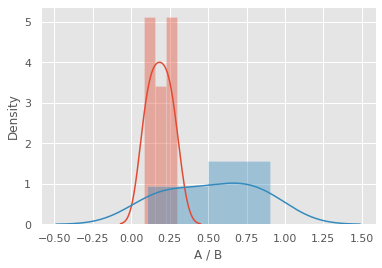

In [6]:
plot_income = sns.distplot(dataset["A"])
plot_spend = sns.distplot(dataset["B"])
plt.xlabel('A / B')
plt.show()

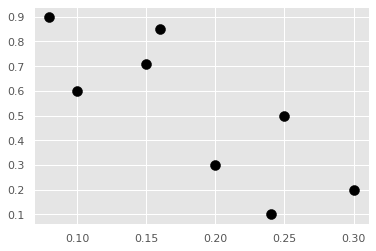

In [9]:
Income = dataset['A'].values
Spend = dataset['B'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)
plt.show()

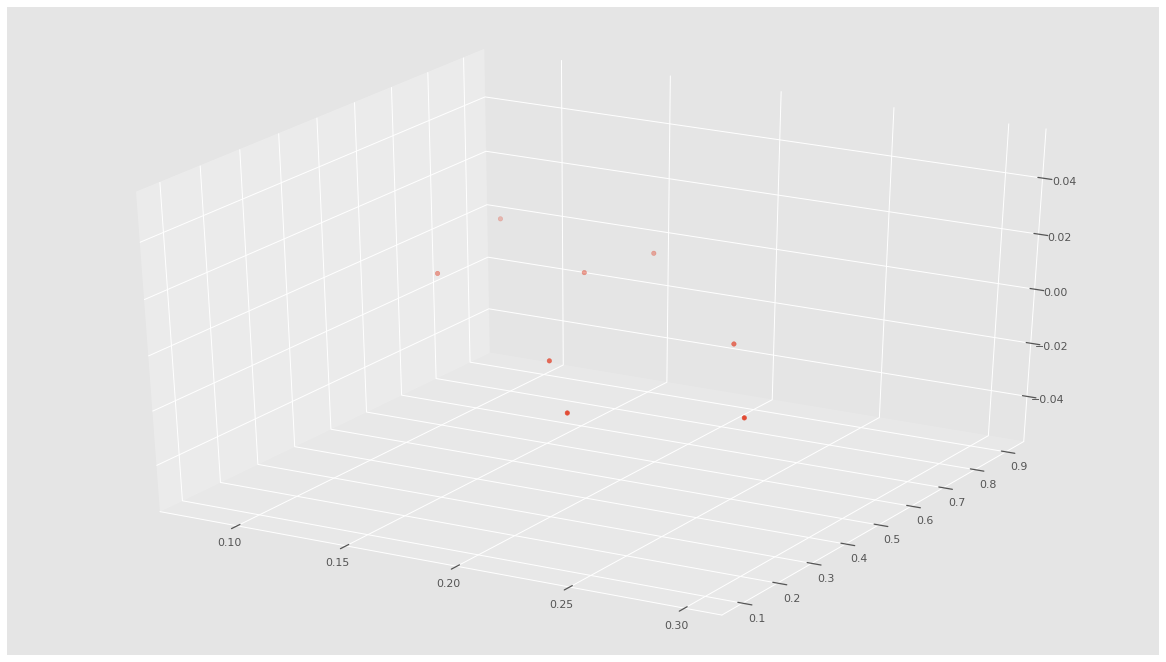

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])
plt.show()

##Clustering

In [18]:
X=dataset.iloc[:,[0,1]].values

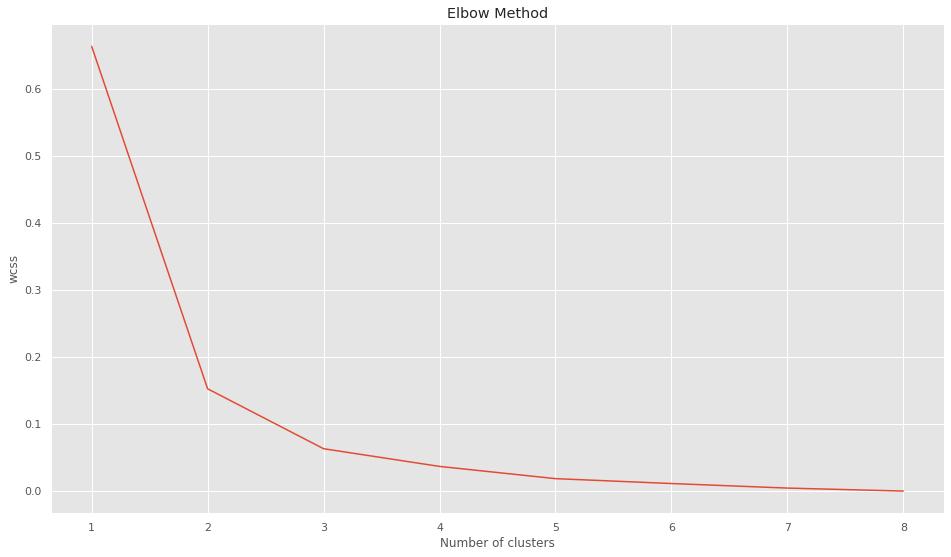

In [21]:
wcss = []
for i in range(1, 9):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=8, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1, 9),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
for n_cluster in range(2, 7):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5482187487258159
For n_clusters=3, The Silhouette Coefficient is 0.4883240995532747
For n_clusters=4, The Silhouette Coefficient is 0.3890839095417038
For n_clusters=5, The Silhouette Coefficient is 0.29734605006786036
For n_clusters=6, The Silhouette Coefficient is 0.18319406947008443


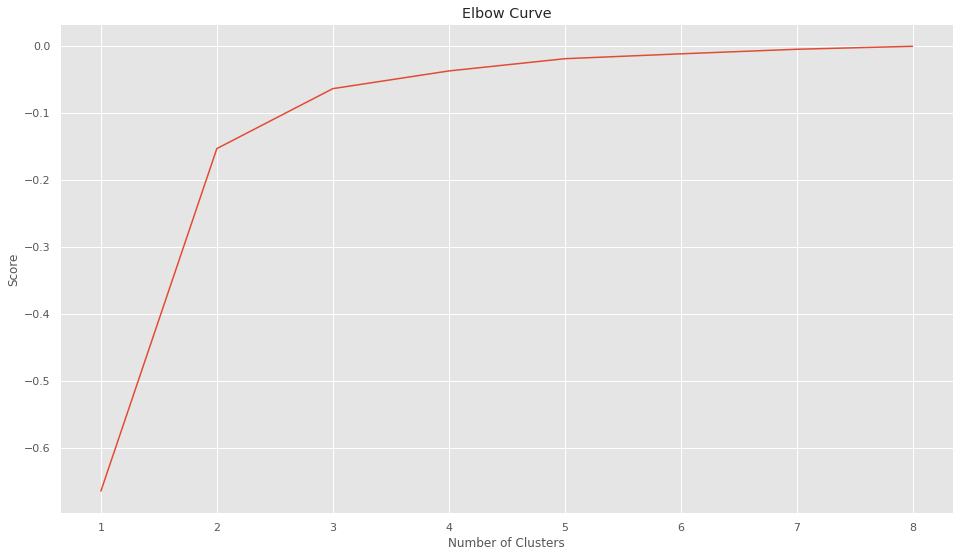

In [30]:
Nc = range(1, 9)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [31]:
print('\nThe Score is:', score)


The Score is: [-0.6642, -0.15275000000000002, -0.06324999999999999, -0.036816666666666664, -0.01855, -0.011250000000000003, -0.0044500000000000026, -7.703719777548943e-34]


In [32]:
for k in range (1, 9):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 0.6642
k: 2  cost: 0.15275000000000002
k: 3  cost: 0.06325
k: 4  cost: 0.036816666666666664
k: 5  cost: 0.018550000000000004
k: 6  cost: 0.011250000000000007
k: 7  cost: 0.0044500000000000026
k: 8  cost: 0.0



##Model Fitting

In [33]:
km4=KMeans(n_clusters=4,init='k-means++', max_iter=8, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

##Visualizing the Results

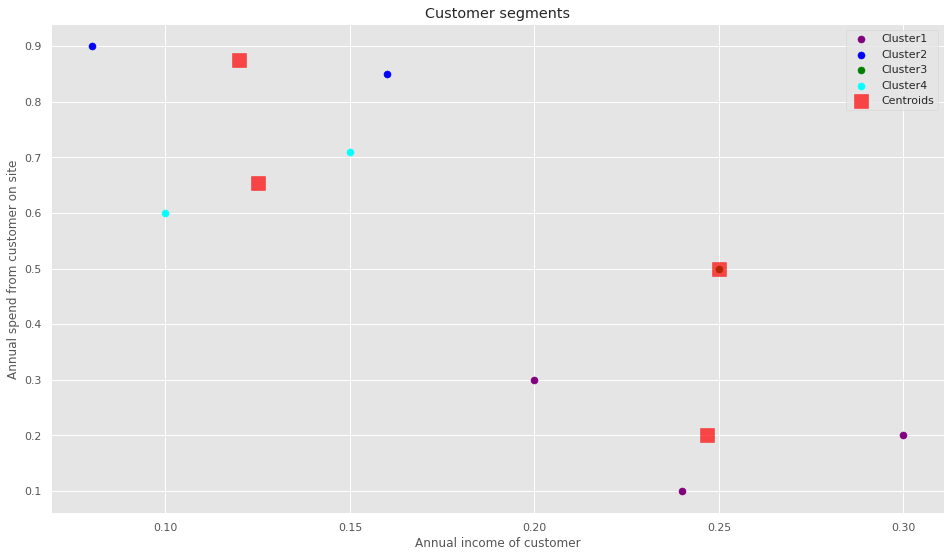

In [34]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

###Cluster visualization

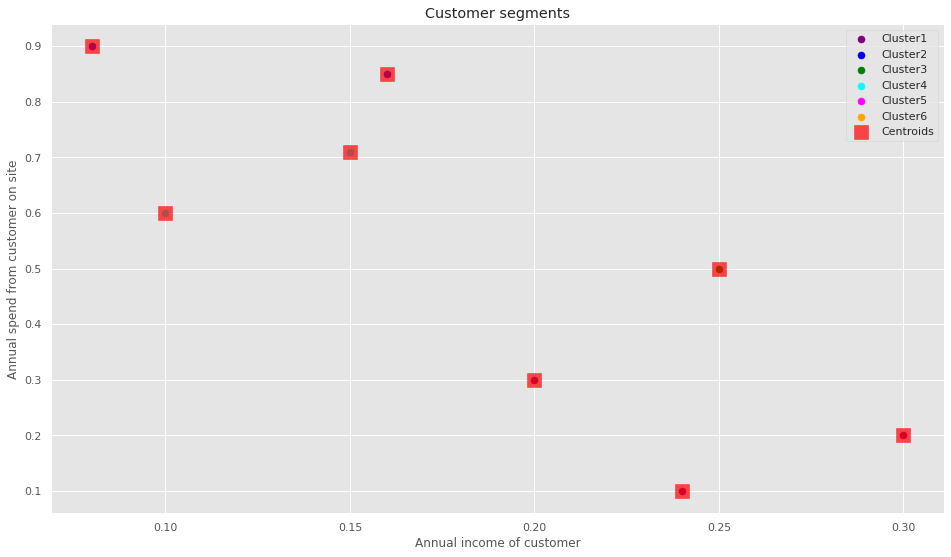

In [35]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

###Dendogram visualization

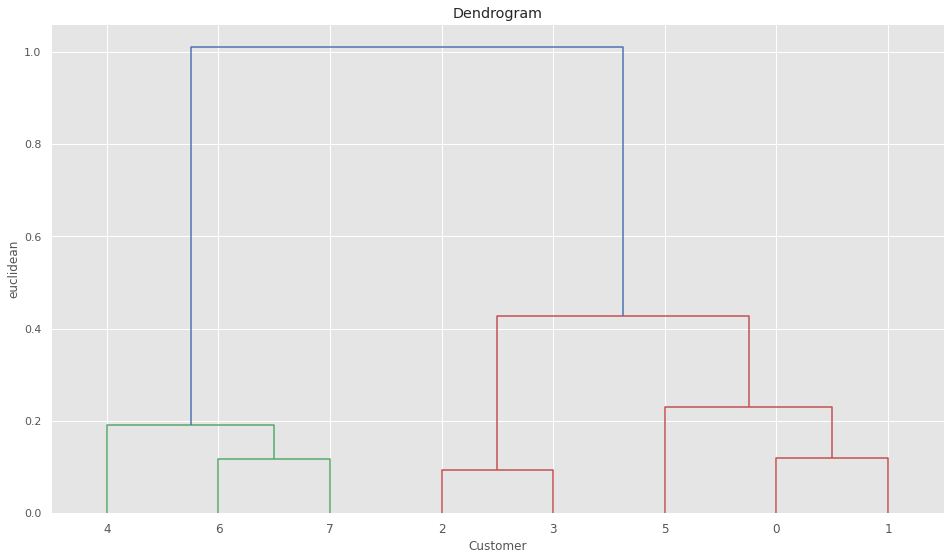

In [37]:
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

##Fitting Hierarchical Clustering

In [39]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

###Visualizaing the clusters

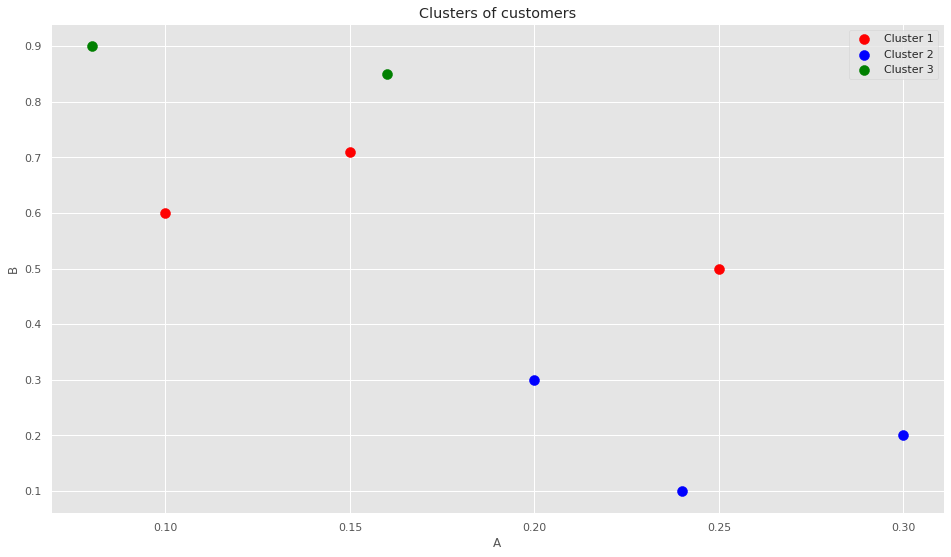

In [41]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of customers')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.show()

##Thank You!